In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.io import loadmat
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
import re
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
def plotData(X , y ,S):
    pos= (y==1).ravel()
    neg= (y==0).ravel()

    plt.scatter(X[pos,0], X[pos,1], s=S, c='b', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=S, c='r', marker='o', linewidths=1)


def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotData(X, y, 6)
    # plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='|', s=100, linewidths='5')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()


In [3]:
split_df =  pd.read_csv('split_df.csv',encoding='utf-8-sig')

In [4]:
split_df

,Table 1,Spectacles,Age,Gender,Name,id,Eye,VA,CDR,Diagnosis,IOP,Image
0,زرق أيمن تم معالجته جراحيا,0.0,64,0,شاهين ميرو,1.0,0,0.6,0.5,0,14.0,Data/SHAHEN_MERO Optic nerve.png_ left.png
1,زرق أيمن تم معالجته جراحيا,0.0,64,0,شاهين ميرو,1.0,1,0.7,0.9,1,23.0,Data/SHAHEN_MERO Optic nerve.png_ left.png
2,زرق متقدم,1.0,62,0,أيمن سمارة,2.0,0,NaN,NaN,1,25.0,Data/SHAHEN_MERO Optic nerve.png_ right.png
3,زرق متقدم,1.0,62,0,أيمن سمارة,2.0,1,9.0,0.8,1,40.0,Data/SHAHEN_MERO Optic nerve.png_ right.png
4,لا يوجد زرق,0.0,48,1,رندة ناصر,3.0,0,1.0,0.5,0,15.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85,زرق أيسر تم معالجته جراحيا,1.0,55,1,زريفة المحمد,43.0,1,NaN,NaN,0,NaN,Data/BASEL_BASH Optic nerve.png_ left.png
86,مريض زرقي ثانوي بعد استخراج ساد لا يوجد اصابة ...,0.0,71,0,هيثم قزاز,44.0,0,0.3,0.5,1,15.0,Data/BASEL_BASH Optic nerve.png_ right.png
87,مريض زرقي ثانوي بعد استخراج ساد لا يوجد اصابة ...,0.0,71,0,هيثم قزاز,44.0,1,0.6,0.7,1,16.0,Data/BASEL_BASH Optic nerve.png_ right.png
88,لا يوجد زرق,1.0,65,0,حمود غشام,45.0,0,0.5,0.3,0,15.0,Data/NEZAR_HELOU Optic nerve.png_ left.png


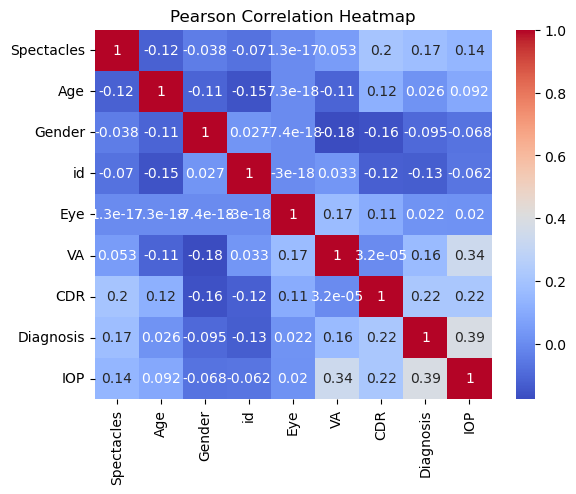

In [5]:
numeric_df = split_df.select_dtypes(include=[np.number])

# حساب مصفوفة الارتباط
correlation_matrix = numeric_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [6]:
split_df=split_df.drop(['Table 1','Gender','id','Name','Eye','Age','Spectacles','Image'],axis=1)
split_df=split_df.dropna(thresh=len(split_df.columns) - 1)

In [7]:
X_data = split_df.drop(['Diagnosis'],axis=1)
y_data = split_df['Diagnosis']

In [8]:
X_data

,VA,CDR,IOP
0,0.6,0.5,14.0
1,0.7,0.9,23.0
3,9.0,0.8,40.0
4,1.0,0.5,15.0
5,1.0,0.4,14.0
...,...,...,...
84,0.2,0.8,10.0
86,0.3,0.5,15.0
87,0.6,0.7,16.0
88,0.5,0.3,15.0


In [9]:
# imputer = SimpleImputer(strategy='mean')
# X_data_imputed = imputer.fit_transform(X_data)

In [10]:
# plotData(X_data_imputed,y_data,5)   

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=44, shuffle=True)


In [12]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [17]:
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train_imputed, y_train)

print("Best parameters found: ", svm_grid_search.best_params_)

best_svm = svm_grid_search.best_estimator_
best_svm.fit(X_train_imputed, y_train)

y_train_pred  = best_svm.predict(X_train_imputed)

train_accuracy = accuracy_score(y_train, y_train_pred )
print(f'Accuracy For train: {train_accuracy:.2f}')

y_pred = best_svm.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Fitting 10 folds for each of 64 candidates, totalling 640 fits
Accuracy For train: 0.81
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.67      0.80         6

    accuracy                           0.78         9
   macro avg       0.80      0.83      0.78         9
weighted avg       0.87      0.78      0.78         9

Confusion Matrix:
[[3 0]
 [2 4]]


In [12]:
clf = svm.SVC(C=0.9,kernel='linear')

clf.fit(X_train_imputed,y_train)

y_pred = clf.predict(X_test_imputed)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)

# طباعة الدقة
print(f'accuracy: {accuracy}')

accuracy: 0.6666666666666666


In [13]:
# clf = svm.SVC(C=0.9,kernel='rbf',gamma=2)
clf.set_params(C=1,kernel='rbf',gamma=50)## Gamma مدى الليونة

clf.fit(X_train_imputed,y_train)

y_pred = clf.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy: {accuracy}')

accuracy: 0.8888888888888888


In [14]:
def predict_category(s, model=clf):
    num_features = np.array(s).reshape(1, -1)
    # arr = np.hstack([num_features])
    pred = model.predict(num_features)
    if pred[0] == 0:
        return 'Not Glaucoma'
    else:
        return 'Glaucoma'

In [15]:
predict_category([[0.5],[0.5],[15.0]])


'Glaucoma'

In [16]:
# clf = svm.SVC(C=1.0,kernel='poly',degree= 3,gamma=3)
clf.set_params(C=9,kernel='poly',degree= 2,gamma=50)

clf.fit(X_train_imputed,y_train)

y_pred = clf.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy: {accuracy}')

accuracy: 0.7777777777777778


In [17]:
clf2 = svm.SVC()

clf2.fit(X_train_imputed,y_train)

y_pred = clf2.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy: {accuracy}')

accuracy: 0.5555555555555556
